In [1]:
import numpy as np
import gym
import my_tictactoe  ## Custom Tic-Tac-Toe environment. See ReadME for instructions on installing

In [2]:
def transform(state):   ### Function to transform the 2D state matrix to a 1D list
    out = []
    for i in range(0,3):
        for j in range(0,3):
            out.append(state[i][j])
    return out

In [3]:
def map_state(state):  ### Function to give a mapping of the states with an integer
    total = 0
    for i in range(0,9):
        if(state[i]=='_'):
            total+=(3**i)*0
        elif(state[i]=='x'):
            total+=(3**i)*1
        elif(state[i]=='o'):
            total+=(3**i)*2
    return total

In [4]:
def action_set(state):  ### Function to return available actions
    act = []
    for i in range(0,9):
        if(state[i]=='_'):
            act.append(i)
    return act

In [5]:
env = gym.make('my_tictactoe-v0')

In [6]:
def epsilon_greedy(Q,s,a_set=[0,1,2,3,4,5,6,7,8]):  ### Function to select an action epsilon greedily. Epsilon = 0.1
    pr = np.random.choice([0,1], p = [0.1,0.9])
    if(pr == 0):
        a = np.random.choice(a_set)
    else:
        temp = np.max(Q[s,a_set])
        for i in range(0,9):
            if Q[s,i] == temp:
                a = i
                break;
    return a

In [7]:
def greedy(Q,s,a_set=[1,2,3,4,5,6,7,8]):  ### Function to select an action greedily.
    pr = np.random.choice([0,1], p = [0,1])
    if(pr == 0):
        a = np.random.choice(a_set)
    else:
        temp = np.max(Q[s,a_set])
        for i in range(0,9):
            if Q[s,i] == temp:
                a = i
                break;
    return a

In [8]:
def safe_choice(state,a_set):   ### Safe choice opponent
    for i in range(0,3):
        if(state[i][0]==state[i][1] and state[i][2] == '_' and state[i][0]=='x'):
            return (i*3+2)
        if(state[i][1]==state[i][2] and state[i][0] == '_' and state[i][1]=='x'):
            return (i*3+0)
        if(state[i][2]==state[i][0] and state[i][1] == '_' and state[i][2]=='x'):
            return (i*3+1)
        
        
        if(state[0][i]==state[1][i] and state[2][i] == '_' and state[0][i]=='x'):
            return (2*3+i)
        if(state[1][i]==state[2][i] and state[0][i] == '_' and state[1][i]=='x'):
            return (0*3+i)
        if(state[2][i]==state[0][i] and state[1][i] == '_' and state[2][i]=='x'):
            return (1*3+i)
        
        
    if(state[0][0]==state[1][1] and state[2][2] == '_' and state[0][0]=='x'):
        return (8)
    if(state[1][1]==state[2][2] and state[0][0] == '_' and state[1][1]=='x'):
        return (0)
    if(state[2][2]==state[0][0] and state[1][1] == '_' and state[2][2]=='x'):
        return (4)

    if(state[0][2]==state[1][1] and state[2][0] == '_' and state[0][2]=='x'):
        return (6)
    if(state[1][1]==state[2][0] and state[0][2] == '_' and state[1][1]=='x'):
        return (2)
    if(state[2][0]==state[0][2] and state[1][1] == '_' and state[2][0]=='x'):
        return (4)
    return np.random.choice(a_set)

In [9]:
gama = 0.5
alpha = 0.7
noe = 10000   ### Number of epochs

In [10]:
env.reset()
env.reset_tally()

In [11]:
###############
###TRAINING ###
###############

In [18]:
Q = np.random.rand(3**9,9)  ## Q table
env.reset_tally()
ef_test = np.empty([50,2])
k = 0
for i in range(0,noe):
    print("Episode =", i)
    env.reset()
    s = 0
    a = epsilon_greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)
    while(is_over!=1):
        r_tot = 0
        p = np.random.choice([0,1],p=[0.5,0.5])
        if(p==0):
            a_choice = safe_choice(state,a_set)
        else:
            a_choice = np.random.choice(a_set)
        state, reward, is_over, tally = env.act(a_choice) ## Training against random agent or safe agent chosen with equal probability
        
        ## Uncomment the following two lines to see the steps of the opponent
#         env.print()
#         print(" ")
        
        state_tr = transform(state)
        a_set = action_set(state_tr)
        r_tot+=reward
        
        s = map_state(state_tr)
        if(len(a_set) == 0):
            break;
        a = epsilon_greedy(Q,s,a_set)

        
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
        r_tot+=reward
        
        if(len(a_set) == 0):
            mx = 0
        else:
            mx = np.max(Q[sn,a_set])
        Q[s,a] = Q[s,a] + alpha*(r_tot + gama*mx - Q[s,a])
        
        ## Uncomment the following two lines to see the steps of the agent
#         env.print()
#         print(" ")

    ## Uncomment the following two lines to see the result tally after each epoch 
#     tl = env.print_tally()
#     print("Our agent won ",tl[0]," matches, opponent won ",tl[1]," matches.")
    print(" ")
    
    ## Checking efficacy as asked in the question
    if(i%200==0):
        ntest = 100
        env.reset()
        env.reset_tally()
        s = 0
        for j in range(0,ntest):
            print("Checking Efficacy, Episode", j)
            env.reset()
            s = 0
            a = greedy(Q,s)
            state, reward, is_over, tally = env.act(a)
            state_tr = transform(state)
            a_set = action_set(state_tr)

            while(is_over!=1):
                p = np.random.choice([0,1],p=[0.5,0.5])
                if(p==0):
                    a_choice = safe_choice(state,a_set)
                else:
                    a_choice = np.random.choice(a_set)
                state, reward, is_over, tally = env.act(a_choice)
                state_tr = transform(state)
                a_set = action_set(state_tr)
                s = map_state(state_tr)

                if(len(a_set) == 0):
                    break;

                a = greedy(Q,s,a_set)
                state, reward, is_over, tally = env.act(a)
                state_tr = transform(state)
                sn = map_state(state_tr)
                a_set = action_set(state_tr)
            temp = env.print_tally()
        ef_test[k,0] = temp[0]
        ef_test[k,1] = temp[1]
#         print("Our agent won ",ef_test[k,0]," matches, opponent won ",ef_test[k,1]," matches.")
        k+=1

Episode = 0
Player  1  wins the round
 
Checking Efficacy, Episode 0
Player  1  wins the round
Checking Efficacy, Episode 1
Player  1  wins the round
Checking Efficacy, Episode 2
Checking Efficacy, Episode 3
Player  1  wins the round
Checking Efficacy, Episode 4
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Player  1  wins the round
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Checking Efficacy, Episode 9
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Checking Efficacy, Episode 12
Player  1  wins the round
Checking Efficacy, Episode 13
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Checking Efficacy, Episode 16
Player  1  wins the round
Checking Efficacy, Episode 17
Checking Efficacy, Episode 18
Checking Efficacy, Episode 19
Player  2  wins the round
Game Over
Checking Efficacy, Episode 20
Player  2  wins the round
Game Over
Checking

Player  2  wins the round
Game Over
 
Episode = 106
Player  1  wins the round
 
Episode = 107
 
Episode = 108
Player  1  wins the round
 
Episode = 109
Player  1  wins the round
 
Episode = 110
Player  1  wins the round
 
Episode = 111
 
Episode = 112
Player  1  wins the round
 
Episode = 113
Player  2  wins the round
Game Over
 
Episode = 114
 
Episode = 115
Player  1  wins the round
 
Episode = 116
 
Episode = 117
Player  1  wins the round
 
Episode = 118
Player  2  wins the round
Game Over
 
Episode = 119
Player  2  wins the round
Game Over
 
Episode = 120
Player  1  wins the round
 
Episode = 121
 
Episode = 122
Player  1  wins the round
 
Episode = 123
Player  1  wins the round
 
Episode = 124
 
Episode = 125
Player  1  wins the round
 
Episode = 126
 
Episode = 127
 
Episode = 128
Player  2  wins the round
Game Over
 
Episode = 129
Player  2  wins the round
Game Over
 
Episode = 130
 
Episode = 131
Player  2  wins the round
Game Over
 
Episode = 132
Player  2  wins the round
Game

Player  1  wins the round
 
Episode = 370
Player  1  wins the round
 
Episode = 371
 
Episode = 372
Player  1  wins the round
 
Episode = 373
Player  1  wins the round
 
Episode = 374
Player  1  wins the round
 
Episode = 375
Player  2  wins the round
Game Over
 
Episode = 376
Player  1  wins the round
 
Episode = 377
Player  1  wins the round
 
Episode = 378
Player  1  wins the round
 
Episode = 379
Player  1  wins the round
 
Episode = 380
Player  1  wins the round
 
Episode = 381
Player  1  wins the round
 
Episode = 382
 
Episode = 383
Player  1  wins the round
 
Episode = 384
Player  2  wins the round
Game Over
 
Episode = 385
 
Episode = 386
Player  1  wins the round
 
Episode = 387
 
Episode = 388
Player  2  wins the round
Game Over
 
Episode = 389
Player  1  wins the round
 
Episode = 390
 
Episode = 391
Player  1  wins the round
 
Episode = 392
 
Episode = 393
Player  2  wins the round
Game Over
 
Episode = 394
Player  1  wins the round
 
Episode = 395
Player  1  wins the roun

 
Episode = 450
 
Episode = 451
Player  1  wins the round
 
Episode = 452
Player  1  wins the round
 
Episode = 453
Player  1  wins the round
 
Episode = 454
 
Episode = 455
 
Episode = 456
Player  2  wins the round
Game Over
 
Episode = 457
 
Episode = 458
Player  1  wins the round
 
Episode = 459
Player  1  wins the round
 
Episode = 460
 
Episode = 461
Player  2  wins the round
Game Over
 
Episode = 462
Player  1  wins the round
 
Episode = 463
Player  2  wins the round
Game Over
 
Episode = 464
Player  1  wins the round
 
Episode = 465
 
Episode = 466
Player  1  wins the round
 
Episode = 467
Player  1  wins the round
 
Episode = 468
 
Episode = 469
Player  1  wins the round
 
Episode = 470
Player  1  wins the round
 
Episode = 471
Player  2  wins the round
Game Over
 
Episode = 472
Player  1  wins the round
 
Episode = 473
Player  1  wins the round
 
Episode = 474
Player  1  wins the round
 
Episode = 475
Player  1  wins the round
 
Episode = 476
Player  1  wins the round
 
Episod

Player  1  wins the round
 
Episode = 646
Player  1  wins the round
 
Episode = 647
Player  1  wins the round
 
Episode = 648
Player  1  wins the round
 
Episode = 649
Player  1  wins the round
 
Episode = 650
Player  2  wins the round
Game Over
 
Episode = 651
Player  2  wins the round
Game Over
 
Episode = 652
Player  2  wins the round
Game Over
 
Episode = 653
Player  1  wins the round
 
Episode = 654
 
Episode = 655
Player  1  wins the round
 
Episode = 656
Player  1  wins the round
 
Episode = 657
Player  1  wins the round
 
Episode = 658
Player  2  wins the round
Game Over
 
Episode = 659
Player  2  wins the round
Game Over
 
Episode = 660
Player  2  wins the round
Game Over
 
Episode = 661
 
Episode = 662
 
Episode = 663
Player  1  wins the round
 
Episode = 664
Player  2  wins the round
Game Over
 
Episode = 665
Player  1  wins the round
 
Episode = 666
Player  2  wins the round
Game Over
 
Episode = 667
Player  2  wins the round
Game Over
 
Episode = 668
Player  1  wins the ro

Player  2  wins the round
Game Over
Checking Efficacy, Episode 49
Player  2  wins the round
Game Over
Checking Efficacy, Episode 50
Player  1  wins the round
Checking Efficacy, Episode 51
Player  1  wins the round
Checking Efficacy, Episode 52
Player  1  wins the round
Checking Efficacy, Episode 53
Player  1  wins the round
Checking Efficacy, Episode 54
Player  1  wins the round
Checking Efficacy, Episode 55
Player  1  wins the round
Checking Efficacy, Episode 56
Checking Efficacy, Episode 57
Player  1  wins the round
Checking Efficacy, Episode 58
Player  1  wins the round
Checking Efficacy, Episode 59
Player  2  wins the round
Game Over
Checking Efficacy, Episode 60
Player  1  wins the round
Checking Efficacy, Episode 61
Player  1  wins the round
Checking Efficacy, Episode 62
Player  1  wins the round
Checking Efficacy, Episode 63
Checking Efficacy, Episode 64
Player  2  wins the round
Game Over
Checking Efficacy, Episode 65
Player  1  wins the round
Checking Efficacy, Episode 66
Play

Player  2  wins the round
Game Over
 
Episode = 958
Player  1  wins the round
 
Episode = 959
Player  1  wins the round
 
Episode = 960
Player  1  wins the round
 
Episode = 961
 
Episode = 962
Player  1  wins the round
 
Episode = 963
 
Episode = 964
Player  1  wins the round
 
Episode = 965
Player  1  wins the round
 
Episode = 966
Player  2  wins the round
Game Over
 
Episode = 967
Player  1  wins the round
 
Episode = 968
 
Episode = 969
 
Episode = 970
 
Episode = 971
Player  2  wins the round
Game Over
 
Episode = 972
Player  1  wins the round
 
Episode = 973
 
Episode = 974
 
Episode = 975
 
Episode = 976
 
Episode = 977
Player  1  wins the round
 
Episode = 978
 
Episode = 979
Player  1  wins the round
 
Episode = 980
Player  2  wins the round
Game Over
 
Episode = 981
Player  2  wins the round
Game Over
 
Episode = 982
Player  1  wins the round
 
Episode = 983
Player  2  wins the round
Game Over
 
Episode = 984
Player  1  wins the round
 
Episode = 985
Player  1  wins the roun

Player  1  wins the round
 
Episode = 1171
Player  1  wins the round
 
Episode = 1172
Player  1  wins the round
 
Episode = 1173
Player  2  wins the round
Game Over
 
Episode = 1174
Player  2  wins the round
Game Over
 
Episode = 1175
Player  1  wins the round
 
Episode = 1176
Player  1  wins the round
 
Episode = 1177
 
Episode = 1178
Player  1  wins the round
 
Episode = 1179
Player  1  wins the round
 
Episode = 1180
 
Episode = 1181
 
Episode = 1182
Player  1  wins the round
 
Episode = 1183
Player  1  wins the round
 
Episode = 1184
Player  1  wins the round
 
Episode = 1185
 
Episode = 1186
Player  2  wins the round
Game Over
 
Episode = 1187
Player  1  wins the round
 
Episode = 1188
 
Episode = 1189
 
Episode = 1190
Player  1  wins the round
 
Episode = 1191
Player  1  wins the round
 
Episode = 1192
Player  1  wins the round
 
Episode = 1193
Player  1  wins the round
 
Episode = 1194
Player  1  wins the round
 
Episode = 1195
Player  2  wins the round
Game Over
 
Episode = 119

 
Episode = 1263
Player  2  wins the round
Game Over
 
Episode = 1264
Player  2  wins the round
Game Over
 
Episode = 1265
Player  2  wins the round
Game Over
 
Episode = 1266
Player  1  wins the round
 
Episode = 1267
Player  1  wins the round
 
Episode = 1268
 
Episode = 1269
Player  2  wins the round
Game Over
 
Episode = 1270
 
Episode = 1271
Player  1  wins the round
 
Episode = 1272
Player  2  wins the round
Game Over
 
Episode = 1273
Player  1  wins the round
 
Episode = 1274
Player  2  wins the round
Game Over
 
Episode = 1275
Player  2  wins the round
Game Over
 
Episode = 1276
Player  1  wins the round
 
Episode = 1277
 
Episode = 1278
Player  2  wins the round
Game Over
 
Episode = 1279
Player  1  wins the round
 
Episode = 1280
Player  1  wins the round
 
Episode = 1281
 
Episode = 1282
Player  1  wins the round
 
Episode = 1283
Player  2  wins the round
Game Over
 
Episode = 1284
 
Episode = 1285
 
Episode = 1286
Player  1  wins the round
 
Episode = 1287
 
Episode = 1288


Player  2  wins the round
Game Over
Checking Efficacy, Episode 71
Player  1  wins the round
Checking Efficacy, Episode 72
Player  2  wins the round
Game Over
Checking Efficacy, Episode 73
Player  1  wins the round
Checking Efficacy, Episode 74
Player  2  wins the round
Game Over
Checking Efficacy, Episode 75
Player  1  wins the round
Checking Efficacy, Episode 76
Player  2  wins the round
Game Over
Checking Efficacy, Episode 77
Checking Efficacy, Episode 78
Player  2  wins the round
Game Over
Checking Efficacy, Episode 79
Player  1  wins the round
Checking Efficacy, Episode 80
Player  1  wins the round
Checking Efficacy, Episode 81
Player  1  wins the round
Checking Efficacy, Episode 82
Player  2  wins the round
Game Over
Checking Efficacy, Episode 83
Player  2  wins the round
Game Over
Checking Efficacy, Episode 84
Player  2  wins the round
Game Over
Checking Efficacy, Episode 85
Player  2  wins the round
Game Over
Checking Efficacy, Episode 86
Player  1  wins the round
Checking Effic

Player  1  wins the round
 
Episode = 1631
Player  2  wins the round
Game Over
 
Episode = 1632
Player  1  wins the round
 
Episode = 1633
Player  1  wins the round
 
Episode = 1634
 
Episode = 1635
Player  1  wins the round
 
Episode = 1636
 
Episode = 1637
 
Episode = 1638
Player  1  wins the round
 
Episode = 1639
Player  1  wins the round
 
Episode = 1640
Player  2  wins the round
Game Over
 
Episode = 1641
 
Episode = 1642
Player  1  wins the round
 
Episode = 1643
Player  1  wins the round
 
Episode = 1644
Player  1  wins the round
 
Episode = 1645
Player  2  wins the round
Game Over
 
Episode = 1646
Player  1  wins the round
 
Episode = 1647
Player  2  wins the round
Game Over
 
Episode = 1648
Player  1  wins the round
 
Episode = 1649
Player  2  wins the round
Game Over
 
Episode = 1650
Player  1  wins the round
 
Episode = 1651
Player  2  wins the round
Game Over
 
Episode = 1652
Player  2  wins the round
Game Over
 
Episode = 1653
Player  1  wins the round
 
Episode = 1654
Pl

Player  2  wins the round
Game Over
 
Episode = 1845
Player  2  wins the round
Game Over
 
Episode = 1846
Player  2  wins the round
Game Over
 
Episode = 1847
 
Episode = 1848
 
Episode = 1849
Player  1  wins the round
 
Episode = 1850
 
Episode = 1851
Player  1  wins the round
 
Episode = 1852
Player  1  wins the round
 
Episode = 1853
Player  2  wins the round
Game Over
 
Episode = 1854
Player  2  wins the round
Game Over
 
Episode = 1855
Player  2  wins the round
Game Over
 
Episode = 1856
Player  1  wins the round
 
Episode = 1857
Player  1  wins the round
 
Episode = 1858
 
Episode = 1859
Player  2  wins the round
Game Over
 
Episode = 1860
Player  2  wins the round
Game Over
 
Episode = 1861
Player  1  wins the round
 
Episode = 1862
Player  1  wins the round
 
Episode = 1863
Player  1  wins the round
 
Episode = 1864
Player  1  wins the round
 
Episode = 1865
Player  1  wins the round
 
Episode = 1866
Player  2  wins the round
Game Over
 
Episode = 1867
Player  1  wins the round

 
Episode = 2060
Player  1  wins the round
 
Episode = 2061
Player  1  wins the round
 
Episode = 2062
Player  1  wins the round
 
Episode = 2063
Player  1  wins the round
 
Episode = 2064
Player  1  wins the round
 
Episode = 2065
Player  1  wins the round
 
Episode = 2066
 
Episode = 2067
Player  2  wins the round
Game Over
 
Episode = 2068
Player  2  wins the round
Game Over
 
Episode = 2069
Player  1  wins the round
 
Episode = 2070
 
Episode = 2071
Player  2  wins the round
Game Over
 
Episode = 2072
Player  2  wins the round
Game Over
 
Episode = 2073
Player  1  wins the round
 
Episode = 2074
Player  1  wins the round
 
Episode = 2075
 
Episode = 2076
Player  1  wins the round
 
Episode = 2077
 
Episode = 2078
Player  1  wins the round
 
Episode = 2079
Player  2  wins the round
Game Over
 
Episode = 2080
Player  1  wins the round
 
Episode = 2081
Player  1  wins the round
 
Episode = 2082
 
Episode = 2083
Player  2  wins the round
Game Over
 
Episode = 2084
Player  1  wins the r

Player  1  wins the round
 
Episode = 2323
Player  1  wins the round
 
Episode = 2324
Player  1  wins the round
 
Episode = 2325
 
Episode = 2326
Player  1  wins the round
 
Episode = 2327
Player  1  wins the round
 
Episode = 2328
 
Episode = 2329
Player  1  wins the round
 
Episode = 2330
Player  1  wins the round
 
Episode = 2331
 
Episode = 2332
Player  1  wins the round
 
Episode = 2333
 
Episode = 2334
Player  1  wins the round
 
Episode = 2335
Player  1  wins the round
 
Episode = 2336
Player  1  wins the round
 
Episode = 2337
Player  1  wins the round
 
Episode = 2338
 
Episode = 2339
Player  1  wins the round
 
Episode = 2340
 
Episode = 2341
Player  2  wins the round
Game Over
 
Episode = 2342
Player  2  wins the round
Game Over
 
Episode = 2343
 
Episode = 2344
Player  1  wins the round
 
Episode = 2345
Player  2  wins the round
Game Over
 
Episode = 2346
Player  2  wins the round
Game Over
 
Episode = 2347
Player  2  wins the round
Game Over
 
Episode = 2348
 
Episode = 23

Player  2  wins the round
Game Over
 
Episode = 2425
Player  1  wins the round
 
Episode = 2426
 
Episode = 2427
Player  1  wins the round
 
Episode = 2428
Player  1  wins the round
 
Episode = 2429
Player  1  wins the round
 
Episode = 2430
Player  1  wins the round
 
Episode = 2431
Player  1  wins the round
 
Episode = 2432
Player  1  wins the round
 
Episode = 2433
 
Episode = 2434
Player  1  wins the round
 
Episode = 2435
Player  1  wins the round
 
Episode = 2436
 
Episode = 2437
Player  2  wins the round
Game Over
 
Episode = 2438
Player  2  wins the round
Game Over
 
Episode = 2439
Player  1  wins the round
 
Episode = 2440
Player  1  wins the round
 
Episode = 2441
Player  1  wins the round
 
Episode = 2442
Player  1  wins the round
 
Episode = 2443
Player  1  wins the round
 
Episode = 2444
Player  1  wins the round
 
Episode = 2445
 
Episode = 2446
Player  1  wins the round
 
Episode = 2447
Player  1  wins the round
 
Episode = 2448
Player  2  wins the round
Game Over
 
Epis

Player  1  wins the round
 
Episode = 2699
Player  2  wins the round
Game Over
 
Episode = 2700
Player  1  wins the round
 
Episode = 2701
Player  2  wins the round
Game Over
 
Episode = 2702
Player  2  wins the round
Game Over
 
Episode = 2703
 
Episode = 2704
 
Episode = 2705
Player  2  wins the round
Game Over
 
Episode = 2706
Player  1  wins the round
 
Episode = 2707
Player  1  wins the round
 
Episode = 2708
Player  1  wins the round
 
Episode = 2709
Player  1  wins the round
 
Episode = 2710
Player  2  wins the round
Game Over
 
Episode = 2711
 
Episode = 2712
Player  1  wins the round
 
Episode = 2713
Player  1  wins the round
 
Episode = 2714
Player  1  wins the round
 
Episode = 2715
Player  1  wins the round
 
Episode = 2716
 
Episode = 2717
Player  1  wins the round
 
Episode = 2718
Player  1  wins the round
 
Episode = 2719
Player  2  wins the round
Game Over
 
Episode = 2720
Player  2  wins the round
Game Over
 
Episode = 2721
Player  2  wins the round
Game Over
 
Episode

Player  2  wins the round
Game Over
 
Episode = 2962
Player  1  wins the round
 
Episode = 2963
 
Episode = 2964
 
Episode = 2965
Player  2  wins the round
Game Over
 
Episode = 2966
Player  1  wins the round
 
Episode = 2967
Player  2  wins the round
Game Over
 
Episode = 2968
 
Episode = 2969
Player  2  wins the round
Game Over
 
Episode = 2970
Player  1  wins the round
 
Episode = 2971
Player  2  wins the round
Game Over
 
Episode = 2972
Player  1  wins the round
 
Episode = 2973
 
Episode = 2974
Player  1  wins the round
 
Episode = 2975
Player  1  wins the round
 
Episode = 2976
Player  2  wins the round
Game Over
 
Episode = 2977
Player  1  wins the round
 
Episode = 2978
Player  1  wins the round
 
Episode = 2979
Player  2  wins the round
Game Over
 
Episode = 2980
 
Episode = 2981
Player  2  wins the round
Game Over
 
Episode = 2982
Player  1  wins the round
 
Episode = 2983
Player  2  wins the round
Game Over
 
Episode = 2984
Player  1  wins the round
 
Episode = 2985
Player  

Player  2  wins the round
Game Over
 
Episode = 3064
Player  1  wins the round
 
Episode = 3065
Player  2  wins the round
Game Over
 
Episode = 3066
Player  1  wins the round
 
Episode = 3067
Player  1  wins the round
 
Episode = 3068
Player  1  wins the round
 
Episode = 3069
Player  1  wins the round
 
Episode = 3070
Player  1  wins the round
 
Episode = 3071
Player  1  wins the round
 
Episode = 3072
Player  2  wins the round
Game Over
 
Episode = 3073
Player  2  wins the round
Game Over
 
Episode = 3074
Player  2  wins the round
Game Over
 
Episode = 3075
Player  1  wins the round
 
Episode = 3076
Player  2  wins the round
Game Over
 
Episode = 3077
Player  1  wins the round
 
Episode = 3078
 
Episode = 3079
Player  2  wins the round
Game Over
 
Episode = 3080
Player  1  wins the round
 
Episode = 3081
Player  1  wins the round
 
Episode = 3082
 
Episode = 3083
Player  1  wins the round
 
Episode = 3084
Player  2  wins the round
Game Over
 
Episode = 3085
Player  1  wins the round


 
Episode = 3327
Player  2  wins the round
Game Over
 
Episode = 3328
Player  1  wins the round
 
Episode = 3329
Player  1  wins the round
 
Episode = 3330
 
Episode = 3331
Player  1  wins the round
 
Episode = 3332
Player  1  wins the round
 
Episode = 3333
Player  2  wins the round
Game Over
 
Episode = 3334
Player  2  wins the round
Game Over
 
Episode = 3335
Player  1  wins the round
 
Episode = 3336
Player  1  wins the round
 
Episode = 3337
Player  2  wins the round
Game Over
 
Episode = 3338
 
Episode = 3339
Player  2  wins the round
Game Over
 
Episode = 3340
Player  1  wins the round
 
Episode = 3341
Player  1  wins the round
 
Episode = 3342
Player  1  wins the round
 
Episode = 3343
Player  1  wins the round
 
Episode = 3344
Player  2  wins the round
Game Over
 
Episode = 3345
 
Episode = 3346
Player  2  wins the round
Game Over
 
Episode = 3347
Player  1  wins the round
 
Episode = 3348
 
Episode = 3349
 
Episode = 3350
Player  2  wins the round
Game Over
 
Episode = 3351
 

 
Episode = 3551
Player  1  wins the round
 
Episode = 3552
Player  1  wins the round
 
Episode = 3553
Player  1  wins the round
 
Episode = 3554
Player  2  wins the round
Game Over
 
Episode = 3555
Player  1  wins the round
 
Episode = 3556
Player  1  wins the round
 
Episode = 3557
Player  1  wins the round
 
Episode = 3558
Player  1  wins the round
 
Episode = 3559
Player  1  wins the round
 
Episode = 3560
Player  2  wins the round
Game Over
 
Episode = 3561
Player  1  wins the round
 
Episode = 3562
Player  1  wins the round
 
Episode = 3563
Player  1  wins the round
 
Episode = 3564
Player  1  wins the round
 
Episode = 3565
Player  1  wins the round
 
Episode = 3566
Player  2  wins the round
Game Over
 
Episode = 3567
Player  1  wins the round
 
Episode = 3568
Player  1  wins the round
 
Episode = 3569
 
Episode = 3570
Player  1  wins the round
 
Episode = 3571
Player  2  wins the round
Game Over
 
Episode = 3572
Player  1  wins the round
 
Episode = 3573
Player  1  wins the rou

Player  1  wins the round
 
Episode = 3619
Player  1  wins the round
 
Episode = 3620
 
Episode = 3621
Player  2  wins the round
Game Over
 
Episode = 3622
Player  2  wins the round
Game Over
 
Episode = 3623
Player  1  wins the round
 
Episode = 3624
Player  1  wins the round
 
Episode = 3625
Player  2  wins the round
Game Over
 
Episode = 3626
 
Episode = 3627
Player  1  wins the round
 
Episode = 3628
Player  1  wins the round
 
Episode = 3629
Player  1  wins the round
 
Episode = 3630
Player  1  wins the round
 
Episode = 3631
 
Episode = 3632
Player  1  wins the round
 
Episode = 3633
Player  1  wins the round
 
Episode = 3634
Player  1  wins the round
 
Episode = 3635
Player  1  wins the round
 
Episode = 3636
Player  2  wins the round
Game Over
 
Episode = 3637
Player  2  wins the round
Game Over
 
Episode = 3638
Player  2  wins the round
Game Over
 
Episode = 3639
Player  1  wins the round
 
Episode = 3640
Player  2  wins the round
Game Over
 
Episode = 3641
Player  2  wins the

Player  2  wins the round
Game Over
 
Episode = 3850
 
Episode = 3851
Player  1  wins the round
 
Episode = 3852
Player  2  wins the round
Game Over
 
Episode = 3853
Player  1  wins the round
 
Episode = 3854
Player  1  wins the round
 
Episode = 3855
Player  2  wins the round
Game Over
 
Episode = 3856
Player  2  wins the round
Game Over
 
Episode = 3857
Player  2  wins the round
Game Over
 
Episode = 3858
 
Episode = 3859
 
Episode = 3860
Player  1  wins the round
 
Episode = 3861
Player  2  wins the round
Game Over
 
Episode = 3862
Player  2  wins the round
Game Over
 
Episode = 3863
 
Episode = 3864
Player  1  wins the round
 
Episode = 3865
Player  1  wins the round
 
Episode = 3866
Player  1  wins the round
 
Episode = 3867
 
Episode = 3868
Player  1  wins the round
 
Episode = 3869
 
Episode = 3870
 
Episode = 3871
 
Episode = 3872
Player  1  wins the round
 
Episode = 3873
 
Episode = 3874
Player  1  wins the round
 
Episode = 3875
Player  2  wins the round
Game Over
 
Episode 

Player  1  wins the round
 
Episode = 4088
Player  2  wins the round
Game Over
 
Episode = 4089
Player  1  wins the round
 
Episode = 4090
Player  1  wins the round
 
Episode = 4091
Player  2  wins the round
Game Over
 
Episode = 4092
Player  2  wins the round
Game Over
 
Episode = 4093
Player  1  wins the round
 
Episode = 4094
Player  1  wins the round
 
Episode = 4095
Player  1  wins the round
 
Episode = 4096
Player  1  wins the round
 
Episode = 4097
Player  2  wins the round
Game Over
 
Episode = 4098
Player  1  wins the round
 
Episode = 4099
 
Episode = 4100
Player  2  wins the round
Game Over
 
Episode = 4101
Player  1  wins the round
 
Episode = 4102
Player  1  wins the round
 
Episode = 4103
Player  2  wins the round
Game Over
 
Episode = 4104
Player  1  wins the round
 
Episode = 4105
 
Episode = 4106
Player  2  wins the round
Game Over
 
Episode = 4107
Player  1  wins the round
 
Episode = 4108
 
Episode = 4109
Player  1  wins the round
 
Episode = 4110
Player  1  wins the

 
Episode = 4347
 
Episode = 4348
Player  2  wins the round
Game Over
 
Episode = 4349
Player  2  wins the round
Game Over
 
Episode = 4350
Player  2  wins the round
Game Over
 
Episode = 4351
Player  2  wins the round
Game Over
 
Episode = 4352
Player  1  wins the round
 
Episode = 4353
Player  1  wins the round
 
Episode = 4354
Player  1  wins the round
 
Episode = 4355
Player  1  wins the round
 
Episode = 4356
Player  1  wins the round
 
Episode = 4357
Player  1  wins the round
 
Episode = 4358
Player  1  wins the round
 
Episode = 4359
Player  1  wins the round
 
Episode = 4360
Player  2  wins the round
Game Over
 
Episode = 4361
Player  2  wins the round
Game Over
 
Episode = 4362
Player  2  wins the round
Game Over
 
Episode = 4363
Player  1  wins the round
 
Episode = 4364
Player  2  wins the round
Game Over
 
Episode = 4365
Player  2  wins the round
Game Over
 
Episode = 4366
Player  1  wins the round
 
Episode = 4367
Player  1  wins the round
 
Episode = 4368
Player  2  wins 

Player  2  wins the round
Game Over
 
Episode = 4559
Player  1  wins the round
 
Episode = 4560
Player  1  wins the round
 
Episode = 4561
Player  1  wins the round
 
Episode = 4562
Player  1  wins the round
 
Episode = 4563
Player  2  wins the round
Game Over
 
Episode = 4564
 
Episode = 4565
 
Episode = 4566
Player  1  wins the round
 
Episode = 4567
Player  1  wins the round
 
Episode = 4568
Player  2  wins the round
Game Over
 
Episode = 4569
Player  2  wins the round
Game Over
 
Episode = 4570
Player  2  wins the round
Game Over
 
Episode = 4571
Player  2  wins the round
Game Over
 
Episode = 4572
Player  1  wins the round
 
Episode = 4573
Player  2  wins the round
Game Over
 
Episode = 4574
Player  2  wins the round
Game Over
 
Episode = 4575
Player  1  wins the round
 
Episode = 4576
Player  1  wins the round
 
Episode = 4577
Player  1  wins the round
 
Episode = 4578
 
Episode = 4579
Player  1  wins the round
 
Episode = 4580
 
Episode = 4581
 
Episode = 4582
Player  2  wins th

Player  1  wins the round
 
Episode = 4645
Player  2  wins the round
Game Over
 
Episode = 4646
Player  2  wins the round
Game Over
 
Episode = 4647
Player  1  wins the round
 
Episode = 4648
Player  2  wins the round
Game Over
 
Episode = 4649
Player  1  wins the round
 
Episode = 4650
Player  2  wins the round
Game Over
 
Episode = 4651
Player  2  wins the round
Game Over
 
Episode = 4652
Player  1  wins the round
 
Episode = 4653
Player  1  wins the round
 
Episode = 4654
Player  1  wins the round
 
Episode = 4655
Player  1  wins the round
 
Episode = 4656
Player  1  wins the round
 
Episode = 4657
Player  2  wins the round
Game Over
 
Episode = 4658
 
Episode = 4659
Player  2  wins the round
Game Over
 
Episode = 4660
 
Episode = 4661
 
Episode = 4662
Player  1  wins the round
 
Episode = 4663
Player  1  wins the round
 
Episode = 4664
Player  1  wins the round
 
Episode = 4665
 
Episode = 4666
Player  1  wins the round
 
Episode = 4667
Player  1  wins the round
 
Episode = 4668
Pl

Game Over
Checking Efficacy, Episode 38
Player  1  wins the round
Checking Efficacy, Episode 39
Checking Efficacy, Episode 40
Player  2  wins the round
Game Over
Checking Efficacy, Episode 41
Player  2  wins the round
Game Over
Checking Efficacy, Episode 42
Player  1  wins the round
Checking Efficacy, Episode 43
Player  1  wins the round
Checking Efficacy, Episode 44
Checking Efficacy, Episode 45
Player  2  wins the round
Game Over
Checking Efficacy, Episode 46
Checking Efficacy, Episode 47
Player  1  wins the round
Checking Efficacy, Episode 48
Player  1  wins the round
Checking Efficacy, Episode 49
Player  1  wins the round
Checking Efficacy, Episode 50
Player  1  wins the round
Checking Efficacy, Episode 51
Player  2  wins the round
Game Over
Checking Efficacy, Episode 52
Checking Efficacy, Episode 53
Checking Efficacy, Episode 54
Player  2  wins the round
Game Over
Checking Efficacy, Episode 55
Checking Efficacy, Episode 56
Player  2  wins the round
Game Over
Checking Efficacy, Epi

Player  1  wins the round
Checking Efficacy, Episode 43
Player  2  wins the round
Game Over
Checking Efficacy, Episode 44
Checking Efficacy, Episode 45
Player  2  wins the round
Game Over
Checking Efficacy, Episode 46
Player  1  wins the round
Checking Efficacy, Episode 47
Checking Efficacy, Episode 48
Player  1  wins the round
Checking Efficacy, Episode 49
Player  2  wins the round
Game Over
Checking Efficacy, Episode 50
Player  2  wins the round
Game Over
Checking Efficacy, Episode 51
Player  1  wins the round
Checking Efficacy, Episode 52
Player  2  wins the round
Game Over
Checking Efficacy, Episode 53
Player  1  wins the round
Checking Efficacy, Episode 54
Checking Efficacy, Episode 55
Player  1  wins the round
Checking Efficacy, Episode 56
Checking Efficacy, Episode 57
Checking Efficacy, Episode 58
Checking Efficacy, Episode 59
Checking Efficacy, Episode 60
Player  2  wins the round
Game Over
Checking Efficacy, Episode 61
Player  1  wins the round
Checking Efficacy, Episode 62
Pl

Player  1  wins the round
Checking Efficacy, Episode 58
Checking Efficacy, Episode 59
Player  1  wins the round
Checking Efficacy, Episode 60
Player  2  wins the round
Game Over
Checking Efficacy, Episode 61
Player  1  wins the round
Checking Efficacy, Episode 62
Checking Efficacy, Episode 63
Player  1  wins the round
Checking Efficacy, Episode 64
Player  2  wins the round
Game Over
Checking Efficacy, Episode 65
Player  1  wins the round
Checking Efficacy, Episode 66
Player  1  wins the round
Checking Efficacy, Episode 67
Player  1  wins the round
Checking Efficacy, Episode 68
Checking Efficacy, Episode 69
Player  1  wins the round
Checking Efficacy, Episode 70
Player  1  wins the round
Checking Efficacy, Episode 71
Player  1  wins the round
Checking Efficacy, Episode 72
Player  1  wins the round
Checking Efficacy, Episode 73
Player  1  wins the round
Checking Efficacy, Episode 74
Player  2  wins the round
Game Over
Checking Efficacy, Episode 75
Player  1  wins the round
Checking Effic

Player  1  wins the round
Checking Efficacy, Episode 93
Player  1  wins the round
Checking Efficacy, Episode 94
Player  1  wins the round
Checking Efficacy, Episode 95
Player  1  wins the round
Checking Efficacy, Episode 96
Checking Efficacy, Episode 97
Checking Efficacy, Episode 98
Checking Efficacy, Episode 99
Player  2  wins the round
Game Over
Episode = 5401
Player  1  wins the round
 
Episode = 5402
Player  2  wins the round
Game Over
 
Episode = 5403
Player  1  wins the round
 
Episode = 5404
Player  1  wins the round
 
Episode = 5405
Player  2  wins the round
Game Over
 
Episode = 5406
 
Episode = 5407
 
Episode = 5408
Player  2  wins the round
Game Over
 
Episode = 5409
Player  2  wins the round
Game Over
 
Episode = 5410
Player  1  wins the round
 
Episode = 5411
Player  2  wins the round
Game Over
 
Episode = 5412
Player  1  wins the round
 
Episode = 5413
Player  1  wins the round
 
Episode = 5414
Player  2  wins the round
Game Over
 
Episode = 5415
Player  1  wins the round

Player  2  wins the round
Game Over
 
Episode = 5631
 
Episode = 5632
Player  1  wins the round
 
Episode = 5633
Player  1  wins the round
 
Episode = 5634
 
Episode = 5635
Player  2  wins the round
Game Over
 
Episode = 5636
Player  1  wins the round
 
Episode = 5637
 
Episode = 5638
Player  1  wins the round
 
Episode = 5639
Player  1  wins the round
 
Episode = 5640
Player  2  wins the round
Game Over
 
Episode = 5641
Player  1  wins the round
 
Episode = 5642
Player  1  wins the round
 
Episode = 5643
 
Episode = 5644
Player  1  wins the round
 
Episode = 5645
Player  1  wins the round
 
Episode = 5646
Player  1  wins the round
 
Episode = 5647
Player  2  wins the round
Game Over
 
Episode = 5648
 
Episode = 5649
 
Episode = 5650
Player  1  wins the round
 
Episode = 5651
 
Episode = 5652
 
Episode = 5653
Player  1  wins the round
 
Episode = 5654
Player  1  wins the round
 
Episode = 5655
Player  2  wins the round
Game Over
 
Episode = 5656
Player  1  wins the round
 
Episode = 56

Player  2  wins the round
Game Over
 
Episode = 5861
Player  1  wins the round
 
Episode = 5862
 
Episode = 5863
Player  1  wins the round
 
Episode = 5864
Player  1  wins the round
 
Episode = 5865
 
Episode = 5866
Player  1  wins the round
 
Episode = 5867
Player  1  wins the round
 
Episode = 5868
Player  1  wins the round
 
Episode = 5869
Player  1  wins the round
 
Episode = 5870
Player  1  wins the round
 
Episode = 5871
 
Episode = 5872
Player  1  wins the round
 
Episode = 5873
Player  1  wins the round
 
Episode = 5874
Player  1  wins the round
 
Episode = 5875
Player  1  wins the round
 
Episode = 5876
Player  1  wins the round
 
Episode = 5877
Player  1  wins the round
 
Episode = 5878
Player  2  wins the round
Game Over
 
Episode = 5879
Player  1  wins the round
 
Episode = 5880
 
Episode = 5881
Player  1  wins the round
 
Episode = 5882
Player  2  wins the round
Game Over
 
Episode = 5883
Player  1  wins the round
 
Episode = 5884
Player  1  wins the round
 
Episode = 5885

 
Episode = 6123
Player  1  wins the round
 
Episode = 6124
Player  2  wins the round
Game Over
 
Episode = 6125
 
Episode = 6126
Player  1  wins the round
 
Episode = 6127
Player  1  wins the round
 
Episode = 6128
 
Episode = 6129
Player  1  wins the round
 
Episode = 6130
Player  2  wins the round
Game Over
 
Episode = 6131
 
Episode = 6132
 
Episode = 6133
Player  2  wins the round
Game Over
 
Episode = 6134
Player  1  wins the round
 
Episode = 6135
Player  1  wins the round
 
Episode = 6136
 
Episode = 6137
Player  1  wins the round
 
Episode = 6138
 
Episode = 6139
Player  1  wins the round
 
Episode = 6140
Player  2  wins the round
Game Over
 
Episode = 6141
Player  1  wins the round
 
Episode = 6142
Player  2  wins the round
Game Over
 
Episode = 6143
Player  1  wins the round
 
Episode = 6144
Player  1  wins the round
 
Episode = 6145
 
Episode = 6146
 
Episode = 6147
Player  1  wins the round
 
Episode = 6148
 
Episode = 6149
 
Episode = 6150
Player  1  wins the round
 
Epis

Player  2  wins the round
Game Over
 
Episode = 6230
Player  1  wins the round
 
Episode = 6231
Player  2  wins the round
Game Over
 
Episode = 6232
Player  1  wins the round
 
Episode = 6233
Player  1  wins the round
 
Episode = 6234
Player  1  wins the round
 
Episode = 6235
 
Episode = 6236
Player  1  wins the round
 
Episode = 6237
Player  2  wins the round
Game Over
 
Episode = 6238
Player  1  wins the round
 
Episode = 6239
Player  1  wins the round
 
Episode = 6240
Player  2  wins the round
Game Over
 
Episode = 6241
Player  1  wins the round
 
Episode = 6242
Player  1  wins the round
 
Episode = 6243
 
Episode = 6244
Player  2  wins the round
Game Over
 
Episode = 6245
Player  1  wins the round
 
Episode = 6246
Player  1  wins the round
 
Episode = 6247
 
Episode = 6248
Player  1  wins the round
 
Episode = 6249
Player  1  wins the round
 
Episode = 6250
Player  2  wins the round
Game Over
 
Episode = 6251
Player  1  wins the round
 
Episode = 6252
Player  1  wins the round
 
E

 
Episode = 6507
Player  1  wins the round
 
Episode = 6508
 
Episode = 6509
Player  1  wins the round
 
Episode = 6510
 
Episode = 6511
Player  1  wins the round
 
Episode = 6512
 
Episode = 6513
 
Episode = 6514
Player  2  wins the round
Game Over
 
Episode = 6515
Player  1  wins the round
 
Episode = 6516
Player  1  wins the round
 
Episode = 6517
Player  2  wins the round
Game Over
 
Episode = 6518
Player  2  wins the round
Game Over
 
Episode = 6519
Player  2  wins the round
Game Over
 
Episode = 6520
Player  1  wins the round
 
Episode = 6521
 
Episode = 6522
Player  1  wins the round
 
Episode = 6523
Player  2  wins the round
Game Over
 
Episode = 6524
 
Episode = 6525
Player  2  wins the round
Game Over
 
Episode = 6526
 
Episode = 6527
Player  1  wins the round
 
Episode = 6528
Player  2  wins the round
Game Over
 
Episode = 6529
 
Episode = 6530
Player  1  wins the round
 
Episode = 6531
Player  1  wins the round
 
Episode = 6532
Player  1  wins the round
 
Episode = 6533
 
E

 
Episode = 6602
Player  2  wins the round
Game Over
 
Episode = 6603
Player  1  wins the round
 
Episode = 6604
 
Episode = 6605
Player  1  wins the round
 
Episode = 6606
Player  1  wins the round
 
Episode = 6607
Player  1  wins the round
 
Episode = 6608
Player  1  wins the round
 
Episode = 6609
Player  1  wins the round
 
Episode = 6610
Player  1  wins the round
 
Episode = 6611
Player  1  wins the round
 
Episode = 6612
Player  1  wins the round
 
Episode = 6613
 
Episode = 6614
 
Episode = 6615
Player  1  wins the round
 
Episode = 6616
 
Episode = 6617
Player  1  wins the round
 
Episode = 6618
Player  1  wins the round
 
Episode = 6619
Player  1  wins the round
 
Episode = 6620
 
Episode = 6621
Player  1  wins the round
 
Episode = 6622
 
Episode = 6623
Player  1  wins the round
 
Episode = 6624
Player  1  wins the round
 
Episode = 6625
Player  1  wins the round
 
Episode = 6626
Player  2  wins the round
Game Over
 
Episode = 6627
 
Episode = 6628
Player  1  wins the round
 

Player  2  wins the round
Game Over
 
Episode = 6898
Player  1  wins the round
 
Episode = 6899
Player  2  wins the round
Game Over
 
Episode = 6900
Player  1  wins the round
 
Episode = 6901
Player  2  wins the round
Game Over
 
Episode = 6902
Player  2  wins the round
Game Over
 
Episode = 6903
 
Episode = 6904
 
Episode = 6905
Player  1  wins the round
 
Episode = 6906
Player  1  wins the round
 
Episode = 6907
Player  1  wins the round
 
Episode = 6908
Player  1  wins the round
 
Episode = 6909
Player  1  wins the round
 
Episode = 6910
Player  1  wins the round
 
Episode = 6911
Player  1  wins the round
 
Episode = 6912
Player  2  wins the round
Game Over
 
Episode = 6913
 
Episode = 6914
Player  1  wins the round
 
Episode = 6915
Player  1  wins the round
 
Episode = 6916
Player  1  wins the round
 
Episode = 6917
Player  1  wins the round
 
Episode = 6918
 
Episode = 6919
 
Episode = 6920
Player  2  wins the round
Game Over
 
Episode = 6921
 
Episode = 6922
Player  2  wins the r

Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Player  2  wins the round
Game Over
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 7001
Player  1  wins the round
 
Episode = 7002
 
Episode = 7003
Player  1  wins the round
 
Episode = 7004
Player  1  wins the round
 
Episode = 7005
Player  1  wins the round
 
Episode = 7006
Player  2  wins the round
Game Over
 
Episode = 7007
Player  1  wins the round
 
Episode = 7008
Player  1  wins the round
 
Episode = 7009
Player  1  wins the round
 
Episode = 7010
Player  2  wins the round
Game Over
 
Episode = 7011
Player  2  wins the round
Game Over
 
Episode = 7012
Player  1  wins the round
 
Episode = 7013
Player  1  wins the round
 
Episode = 7014
Player  1  wins the round
 
Episode = 7015
 
Episode = 7016
 
Episode = 7017
 
Episode = 7018
Player  1  wins the round
 
Episode = 7019
Player  1  wins the round
 
Episode = 7020
 
Episode = 7021
 
Episode = 7022
Player  1  wins the round
 
Ep

 
Episode = 7212
 
Episode = 7213
Player  2  wins the round
Game Over
 
Episode = 7214
Player  2  wins the round
Game Over
 
Episode = 7215
 
Episode = 7216
 
Episode = 7217
Player  1  wins the round
 
Episode = 7218
Player  1  wins the round
 
Episode = 7219
Player  1  wins the round
 
Episode = 7220
Player  1  wins the round
 
Episode = 7221
Player  1  wins the round
 
Episode = 7222
Player  2  wins the round
Game Over
 
Episode = 7223
Player  2  wins the round
Game Over
 
Episode = 7224
Player  1  wins the round
 
Episode = 7225
Player  2  wins the round
Game Over
 
Episode = 7226
Player  1  wins the round
 
Episode = 7227
Player  2  wins the round
Game Over
 
Episode = 7228
Player  1  wins the round
 
Episode = 7229
Player  1  wins the round
 
Episode = 7230
Player  1  wins the round
 
Episode = 7231
Player  1  wins the round
 
Episode = 7232
 
Episode = 7233
Player  1  wins the round
 
Episode = 7234
Player  2  wins the round
Game Over
 
Episode = 7235
 
Episode = 7236
Player  2  

Player  1  wins the round
 
Episode = 7422
Player  2  wins the round
Game Over
 
Episode = 7423
Player  1  wins the round
 
Episode = 7424
Player  2  wins the round
Game Over
 
Episode = 7425
Player  1  wins the round
 
Episode = 7426
 
Episode = 7427
Player  2  wins the round
Game Over
 
Episode = 7428
Player  1  wins the round
 
Episode = 7429
Player  1  wins the round
 
Episode = 7430
Player  1  wins the round
 
Episode = 7431
Player  1  wins the round
 
Episode = 7432
Player  2  wins the round
Game Over
 
Episode = 7433
Player  1  wins the round
 
Episode = 7434
 
Episode = 7435
Player  1  wins the round
 
Episode = 7436
Player  2  wins the round
Game Over
 
Episode = 7437
Player  1  wins the round
 
Episode = 7438
 
Episode = 7439
Player  1  wins the round
 
Episode = 7440
Player  1  wins the round
 
Episode = 7441
Player  1  wins the round
 
Episode = 7442
Player  1  wins the round
 
Episode = 7443
Player  2  wins the round
Game Over
 
Episode = 7444
 
Episode = 7445
Player  1  w

Player  2  wins the round
Game Over
Checking Efficacy, Episode 22
Checking Efficacy, Episode 23
Player  1  wins the round
Checking Efficacy, Episode 24
Player  1  wins the round
Checking Efficacy, Episode 25
Player  1  wins the round
Checking Efficacy, Episode 26
Player  1  wins the round
Checking Efficacy, Episode 27
Player  1  wins the round
Checking Efficacy, Episode 28
Checking Efficacy, Episode 29
Player  1  wins the round
Checking Efficacy, Episode 30
Player  1  wins the round
Checking Efficacy, Episode 31
Player  2  wins the round
Game Over
Checking Efficacy, Episode 32
Checking Efficacy, Episode 33
Player  2  wins the round
Game Over
Checking Efficacy, Episode 34
Player  1  wins the round
Checking Efficacy, Episode 35
Player  2  wins the round
Game Over
Checking Efficacy, Episode 36
Player  1  wins the round
Checking Efficacy, Episode 37
Player  1  wins the round
Checking Efficacy, Episode 38
Player  1  wins the round
Checking Efficacy, Episode 39
Player  1  wins the round
Chec

Player  1  wins the round
 
Episode = 7733
Player  1  wins the round
 
Episode = 7734
Player  1  wins the round
 
Episode = 7735
 
Episode = 7736
Player  1  wins the round
 
Episode = 7737
 
Episode = 7738
Player  2  wins the round
Game Over
 
Episode = 7739
 
Episode = 7740
Player  2  wins the round
Game Over
 
Episode = 7741
Player  2  wins the round
Game Over
 
Episode = 7742
Player  1  wins the round
 
Episode = 7743
Player  1  wins the round
 
Episode = 7744
 
Episode = 7745
Player  1  wins the round
 
Episode = 7746
Player  1  wins the round
 
Episode = 7747
Player  2  wins the round
Game Over
 
Episode = 7748
Player  1  wins the round
 
Episode = 7749
Player  1  wins the round
 
Episode = 7750
Player  1  wins the round
 
Episode = 7751
 
Episode = 7752
 
Episode = 7753
 
Episode = 7754
Player  2  wins the round
Game Over
 
Episode = 7755
Player  2  wins the round
Game Over
 
Episode = 7756
Player  1  wins the round
 
Episode = 7757
Player  1  wins the round
 
Episode = 7758
 
Ep

Player  1  wins the round
 
Episode = 7812
Player  1  wins the round
 
Episode = 7813
Player  1  wins the round
 
Episode = 7814
Player  2  wins the round
Game Over
 
Episode = 7815
Player  1  wins the round
 
Episode = 7816
 
Episode = 7817
Player  2  wins the round
Game Over
 
Episode = 7818
Player  2  wins the round
Game Over
 
Episode = 7819
Player  1  wins the round
 
Episode = 7820
Player  1  wins the round
 
Episode = 7821
 
Episode = 7822
Player  1  wins the round
 
Episode = 7823
Player  1  wins the round
 
Episode = 7824
 
Episode = 7825
Player  1  wins the round
 
Episode = 7826
Player  1  wins the round
 
Episode = 7827
Player  1  wins the round
 
Episode = 7828
Player  1  wins the round
 
Episode = 7829
 
Episode = 7830
 
Episode = 7831
Player  1  wins the round
 
Episode = 7832
 
Episode = 7833
Player  2  wins the round
Game Over
 
Episode = 7834
Player  1  wins the round
 
Episode = 7835
Player  2  wins the round
Game Over
 
Episode = 7836
Player  2  wins the round
Game 

Player  1  wins the round
 
Episode = 8009
Player  1  wins the round
 
Episode = 8010
Player  1  wins the round
 
Episode = 8011
Player  1  wins the round
 
Episode = 8012
 
Episode = 8013
Player  1  wins the round
 
Episode = 8014
Player  1  wins the round
 
Episode = 8015
 
Episode = 8016
Player  1  wins the round
 
Episode = 8017
Player  2  wins the round
Game Over
 
Episode = 8018
Player  1  wins the round
 
Episode = 8019
Player  1  wins the round
 
Episode = 8020
 
Episode = 8021
Player  1  wins the round
 
Episode = 8022
Player  1  wins the round
 
Episode = 8023
Player  1  wins the round
 
Episode = 8024
Player  1  wins the round
 
Episode = 8025
Player  1  wins the round
 
Episode = 8026
Player  1  wins the round
 
Episode = 8027
Player  1  wins the round
 
Episode = 8028
Player  1  wins the round
 
Episode = 8029
 
Episode = 8030
Player  2  wins the round
Game Over
 
Episode = 8031
Player  1  wins the round
 
Episode = 8032
Player  1  wins the round
 
Episode = 8033
Player  2

 
Episode = 8215
 
Episode = 8216
Player  2  wins the round
Game Over
 
Episode = 8217
Player  2  wins the round
Game Over
 
Episode = 8218
Player  1  wins the round
 
Episode = 8219
Player  1  wins the round
 
Episode = 8220
Player  2  wins the round
Game Over
 
Episode = 8221
Player  1  wins the round
 
Episode = 8222
Player  2  wins the round
Game Over
 
Episode = 8223
 
Episode = 8224
Player  2  wins the round
Game Over
 
Episode = 8225
Player  1  wins the round
 
Episode = 8226
Player  2  wins the round
Game Over
 
Episode = 8227
Player  2  wins the round
Game Over
 
Episode = 8228
 
Episode = 8229
Player  1  wins the round
 
Episode = 8230
Player  1  wins the round
 
Episode = 8231
Player  1  wins the round
 
Episode = 8232
Player  2  wins the round
Game Over
 
Episode = 8233
Player  2  wins the round
Game Over
 
Episode = 8234
Player  2  wins the round
Game Over
 
Episode = 8235
Player  1  wins the round
 
Episode = 8236
Player  1  wins the round
 
Episode = 8237
 
Episode = 823

 
Episode = 8415
 
Episode = 8416
Player  1  wins the round
 
Episode = 8417
Player  1  wins the round
 
Episode = 8418
Player  2  wins the round
Game Over
 
Episode = 8419
Player  1  wins the round
 
Episode = 8420
Player  1  wins the round
 
Episode = 8421
 
Episode = 8422
Player  2  wins the round
Game Over
 
Episode = 8423
Player  2  wins the round
Game Over
 
Episode = 8424
Player  1  wins the round
 
Episode = 8425
Player  1  wins the round
 
Episode = 8426
 
Episode = 8427
Player  2  wins the round
Game Over
 
Episode = 8428
Player  1  wins the round
 
Episode = 8429
Player  1  wins the round
 
Episode = 8430
Player  1  wins the round
 
Episode = 8431
Player  1  wins the round
 
Episode = 8432
 
Episode = 8433
Player  1  wins the round
 
Episode = 8434
Player  1  wins the round
 
Episode = 8435
Player  1  wins the round
 
Episode = 8436
Player  1  wins the round
 
Episode = 8437
Player  1  wins the round
 
Episode = 8438
Player  2  wins the round
Game Over
 
Episode = 8439
Playe

Player  2  wins the round
Game Over
Checking Efficacy, Episode 59
Checking Efficacy, Episode 60
Player  2  wins the round
Game Over
Checking Efficacy, Episode 61
Player  2  wins the round
Game Over
Checking Efficacy, Episode 62
Player  2  wins the round
Game Over
Checking Efficacy, Episode 63
Player  1  wins the round
Checking Efficacy, Episode 64
Player  1  wins the round
Checking Efficacy, Episode 65
Checking Efficacy, Episode 66
Player  2  wins the round
Game Over
Checking Efficacy, Episode 67
Player  1  wins the round
Checking Efficacy, Episode 68
Player  1  wins the round
Checking Efficacy, Episode 69
Player  1  wins the round
Checking Efficacy, Episode 70
Player  1  wins the round
Checking Efficacy, Episode 71
Player  2  wins the round
Game Over
Checking Efficacy, Episode 72
Player  2  wins the round
Game Over
Checking Efficacy, Episode 73
Checking Efficacy, Episode 74
Player  2  wins the round
Game Over
Checking Efficacy, Episode 75
Player  1  wins the round
Checking Efficacy, E

Checking Efficacy, Episode 43
Player  1  wins the round
Checking Efficacy, Episode 44
Player  2  wins the round
Game Over
Checking Efficacy, Episode 45
Checking Efficacy, Episode 46
Player  1  wins the round
Checking Efficacy, Episode 47
Player  1  wins the round
Checking Efficacy, Episode 48
Player  2  wins the round
Game Over
Checking Efficacy, Episode 49
Player  1  wins the round
Checking Efficacy, Episode 50
Player  1  wins the round
Checking Efficacy, Episode 51
Checking Efficacy, Episode 52
Player  1  wins the round
Checking Efficacy, Episode 53
Player  1  wins the round
Checking Efficacy, Episode 54
Player  1  wins the round
Checking Efficacy, Episode 55
Checking Efficacy, Episode 56
Player  2  wins the round
Game Over
Checking Efficacy, Episode 57
Player  1  wins the round
Checking Efficacy, Episode 58
Player  2  wins the round
Game Over
Checking Efficacy, Episode 59
Player  1  wins the round
Checking Efficacy, Episode 60
Player  1  wins the round
Checking Efficacy, Episode 61


Player  1  wins the round
Checking Efficacy, Episode 33
Player  1  wins the round
Checking Efficacy, Episode 34
Player  1  wins the round
Checking Efficacy, Episode 35
Player  2  wins the round
Game Over
Checking Efficacy, Episode 36
Player  1  wins the round
Checking Efficacy, Episode 37
Player  2  wins the round
Game Over
Checking Efficacy, Episode 38
Player  2  wins the round
Game Over
Checking Efficacy, Episode 39
Player  1  wins the round
Checking Efficacy, Episode 40
Player  1  wins the round
Checking Efficacy, Episode 41
Checking Efficacy, Episode 42
Checking Efficacy, Episode 43
Player  1  wins the round
Checking Efficacy, Episode 44
Player  2  wins the round
Game Over
Checking Efficacy, Episode 45
Player  1  wins the round
Checking Efficacy, Episode 46
Player  2  wins the round
Game Over
Checking Efficacy, Episode 47
Player  2  wins the round
Game Over
Checking Efficacy, Episode 48
Player  1  wins the round
Checking Efficacy, Episode 49
Player  1  wins the round
Checking Effic

Player  2  wins the round
Game Over
 
Episode = 9143
Player  1  wins the round
 
Episode = 9144
Player  2  wins the round
Game Over
 
Episode = 9145
Player  2  wins the round
Game Over
 
Episode = 9146
Player  1  wins the round
 
Episode = 9147
Player  2  wins the round
Game Over
 
Episode = 9148
 
Episode = 9149
Player  1  wins the round
 
Episode = 9150
Player  1  wins the round
 
Episode = 9151
Player  2  wins the round
Game Over
 
Episode = 9152
Player  2  wins the round
Game Over
 
Episode = 9153
Player  1  wins the round
 
Episode = 9154
 
Episode = 9155
Player  1  wins the round
 
Episode = 9156
Player  1  wins the round
 
Episode = 9157
Player  1  wins the round
 
Episode = 9158
Player  2  wins the round
Game Over
 
Episode = 9159
 
Episode = 9160
Player  1  wins the round
 
Episode = 9161
Player  1  wins the round
 
Episode = 9162
Player  2  wins the round
Game Over
 
Episode = 9163
Player  2  wins the round
Game Over
 
Episode = 9164
Player  2  wins the round
Game Over
 
Epis

Player  1  wins the round
 
Episode = 9236
Player  1  wins the round
 
Episode = 9237
Player  1  wins the round
 
Episode = 9238
Player  2  wins the round
Game Over
 
Episode = 9239
Player  1  wins the round
 
Episode = 9240
Player  1  wins the round
 
Episode = 9241
Player  2  wins the round
Game Over
 
Episode = 9242
Player  2  wins the round
Game Over
 
Episode = 9243
Player  1  wins the round
 
Episode = 9244
Player  1  wins the round
 
Episode = 9245
Player  1  wins the round
 
Episode = 9246
Player  1  wins the round
 
Episode = 9247
Player  1  wins the round
 
Episode = 9248
Player  1  wins the round
 
Episode = 9249
Player  2  wins the round
Game Over
 
Episode = 9250
Player  1  wins the round
 
Episode = 9251
Player  2  wins the round
Game Over
 
Episode = 9252
Player  2  wins the round
Game Over
 
Episode = 9253
Player  1  wins the round
 
Episode = 9254
Player  2  wins the round
Game Over
 
Episode = 9255
Player  2  wins the round
Game Over
 
Episode = 9256
Player  2  wins t

Game Over
Checking Efficacy, Episode 21
Player  1  wins the round
Checking Efficacy, Episode 22
Player  2  wins the round
Game Over
Checking Efficacy, Episode 23
Player  1  wins the round
Checking Efficacy, Episode 24
Player  2  wins the round
Game Over
Checking Efficacy, Episode 25
Checking Efficacy, Episode 26
Player  1  wins the round
Checking Efficacy, Episode 27
Player  2  wins the round
Game Over
Checking Efficacy, Episode 28
Player  2  wins the round
Game Over
Checking Efficacy, Episode 29
Player  1  wins the round
Checking Efficacy, Episode 30
Player  1  wins the round
Checking Efficacy, Episode 31
Player  2  wins the round
Game Over
Checking Efficacy, Episode 32
Player  1  wins the round
Checking Efficacy, Episode 33
Player  1  wins the round
Checking Efficacy, Episode 34
Player  1  wins the round
Checking Efficacy, Episode 35
Player  1  wins the round
Checking Efficacy, Episode 36
Player  1  wins the round
Checking Efficacy, Episode 37
Player  1  wins the round
Checking Effic

 
Episode = 9520
 
Episode = 9521
Player  1  wins the round
 
Episode = 9522
Player  2  wins the round
Game Over
 
Episode = 9523
Player  1  wins the round
 
Episode = 9524
Player  1  wins the round
 
Episode = 9525
Player  1  wins the round
 
Episode = 9526
Player  1  wins the round
 
Episode = 9527
Player  1  wins the round
 
Episode = 9528
Player  1  wins the round
 
Episode = 9529
Player  2  wins the round
Game Over
 
Episode = 9530
Player  2  wins the round
Game Over
 
Episode = 9531
Player  2  wins the round
Game Over
 
Episode = 9532
 
Episode = 9533
Player  2  wins the round
Game Over
 
Episode = 9534
Player  1  wins the round
 
Episode = 9535
Player  1  wins the round
 
Episode = 9536
Player  1  wins the round
 
Episode = 9537
Player  1  wins the round
 
Episode = 9538
Player  1  wins the round
 
Episode = 9539
 
Episode = 9540
Player  1  wins the round
 
Episode = 9541
Player  2  wins the round
Game Over
 
Episode = 9542
Player  1  wins the round
 
Episode = 9543
Player  1  w

Player  1  wins the round
 
Episode = 9603
Player  2  wins the round
Game Over
 
Episode = 9604
Player  1  wins the round
 
Episode = 9605
Player  1  wins the round
 
Episode = 9606
 
Episode = 9607
Player  1  wins the round
 
Episode = 9608
Player  1  wins the round
 
Episode = 9609
Player  1  wins the round
 
Episode = 9610
Player  1  wins the round
 
Episode = 9611
 
Episode = 9612
Player  2  wins the round
Game Over
 
Episode = 9613
Player  1  wins the round
 
Episode = 9614
Player  2  wins the round
Game Over
 
Episode = 9615
Player  1  wins the round
 
Episode = 9616
Player  1  wins the round
 
Episode = 9617
Player  1  wins the round
 
Episode = 9618
Player  1  wins the round
 
Episode = 9619
Player  1  wins the round
 
Episode = 9620
Player  1  wins the round
 
Episode = 9621
 
Episode = 9622
Player  2  wins the round
Game Over
 
Episode = 9623
Player  1  wins the round
 
Episode = 9624
 
Episode = 9625
 
Episode = 9626
Player  1  wins the round
 
Episode = 9627
 
Episode = 962

Player  1  wins the round
Checking Efficacy, Episode 97
Player  2  wins the round
Game Over
Checking Efficacy, Episode 98
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 9801
 
Episode = 9802
 
Episode = 9803
Player  1  wins the round
 
Episode = 9804
 
Episode = 9805
Player  1  wins the round
 
Episode = 9806
Player  1  wins the round
 
Episode = 9807
Player  1  wins the round
 
Episode = 9808
Player  2  wins the round
Game Over
 
Episode = 9809
Player  1  wins the round
 
Episode = 9810
Player  1  wins the round
 
Episode = 9811
 
Episode = 9812
Player  1  wins the round
 
Episode = 9813
Player  1  wins the round
 
Episode = 9814
Player  2  wins the round
Game Over
 
Episode = 9815
 
Episode = 9816
Player  1  wins the round
 
Episode = 9817
 
Episode = 9818
Player  1  wins the round
 
Episode = 9819
Player  2  wins the round
Game Over
 
Episode = 9820
Player  1  wins the round
 
Episode = 9821
Player  1  wins the round
 
Episode = 9822
 
Episode = 9823
Player  2  wi

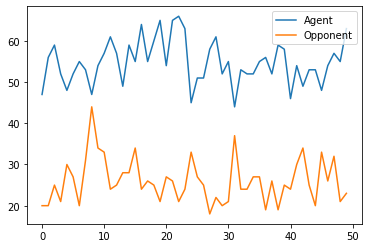

In [19]:
import matplotlib.pyplot as plt ## Plotting number of matches won by agent and opponent during seeing efficacy while training
ax = np.arange(ef_test.shape[0])
plt.plot(ax,ef_test[:,0],label = 'Agent')
plt.plot(ax,ef_test[:,1],label = 'Opponent')
plt.legend()
plt.show()

In [13]:
###########
##TESTING##
###########

In [20]:
ntest = 1000
env.reset()
env.reset_tally()
s = 0
tl = np.zeros([ntest-1,2])

## Testing first half of total matches against random opponent

for i in range(0,int(ntest/2)):
    env.reset()
    print("Episode = ",i)
    s = 0
    a = greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)

    while(is_over!=1):
        state, reward, is_over, tally = env.act(np.random.choice(a_set))
        state_tr = transform(state)
        a_set = action_set(state_tr)
        s = map_state(state_tr)
        
        if(len(a_set) == 0):
            break;
        
        a = greedy(Q,s,a_set)
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
    temp = env.print_tally()
    print("Our agent won ",temp[0]," matches, opponent won ",temp[1]," matches.")
    tl[i,0] = temp[0]
    tl[i,1] = temp[1]
    print(" ")
    
tl2 = []

## Testing second half of total matches against safe opponent

for i in range(0,int(ntest/2)):
    env.reset()
    print("Episode = ",500+i)
    s = 0
    a = greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)
    while(is_over!=1):
        a_choice = safe_choice(state,a_set)
        state, reward, is_over, tally = env.act(a_choice)
        state_tr = transform(state)
        a_set = action_set(state_tr)
        s = map_state(state_tr)
        
        if(len(a_set) == 0):
            break;
        
        a = greedy(Q,s,a_set)
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
    temp = env.print_tally()
    print("Our agent won ",temp[0]," matches, opponent won ",temp[1]," matches.")
    tl[499+i,0] = temp[0]
    tl[499+i,1] = temp[1]
    print(" ")

Episode =  0
Player  1  wins the round
Our agent won  1  matches, opponent won  0  matches.
 
Episode =  1
Player  1  wins the round
Our agent won  2  matches, opponent won  0  matches.
 
Episode =  2
Our agent won  2  matches, opponent won  0  matches.
 
Episode =  3
Player  1  wins the round
Our agent won  3  matches, opponent won  0  matches.
 
Episode =  4
Player  1  wins the round
Our agent won  4  matches, opponent won  0  matches.
 
Episode =  5
Player  1  wins the round
Our agent won  5  matches, opponent won  0  matches.
 
Episode =  6
Player  1  wins the round
Our agent won  6  matches, opponent won  0  matches.
 
Episode =  7
Player  1  wins the round
Our agent won  7  matches, opponent won  0  matches.
 
Episode =  8
Player  2  wins the round
Game Over
Our agent won  7  matches, opponent won  1  matches.
 
Episode =  9
Player  1  wins the round
Our agent won  8  matches, opponent won  1  matches.
 
Episode =  10
Player  1  wins the round
Our agent won  9  matches, opponent 

Our agent won  148  matches, opponent won  21  matches.
 
Episode =  182
Player  1  wins the round
Our agent won  149  matches, opponent won  21  matches.
 
Episode =  183
Our agent won  149  matches, opponent won  21  matches.
 
Episode =  184
Player  1  wins the round
Our agent won  150  matches, opponent won  21  matches.
 
Episode =  185
Our agent won  150  matches, opponent won  21  matches.
 
Episode =  186
Player  2  wins the round
Game Over
Our agent won  150  matches, opponent won  22  matches.
 
Episode =  187
Player  1  wins the round
Our agent won  151  matches, opponent won  22  matches.
 
Episode =  188
Player  1  wins the round
Our agent won  152  matches, opponent won  22  matches.
 
Episode =  189
Player  1  wins the round
Our agent won  153  matches, opponent won  22  matches.
 
Episode =  190
Player  1  wins the round
Our agent won  154  matches, opponent won  22  matches.
 
Episode =  191
Player  1  wins the round
Our agent won  155  matches, opponent won  22  match

Player  1  wins the round
Our agent won  259  matches, opponent won  53  matches.
 
Episode =  340
Player  1  wins the round
Our agent won  260  matches, opponent won  53  matches.
 
Episode =  341
Player  1  wins the round
Our agent won  261  matches, opponent won  53  matches.
 
Episode =  342
Player  1  wins the round
Our agent won  262  matches, opponent won  53  matches.
 
Episode =  343
Player  1  wins the round
Our agent won  263  matches, opponent won  53  matches.
 
Episode =  344
Player  1  wins the round
Our agent won  264  matches, opponent won  53  matches.
 
Episode =  345
Player  2  wins the round
Game Over
Our agent won  264  matches, opponent won  54  matches.
 
Episode =  346
Player  2  wins the round
Game Over
Our agent won  264  matches, opponent won  55  matches.
 
Episode =  347
Player  1  wins the round
Our agent won  265  matches, opponent won  55  matches.
 
Episode =  348
Player  1  wins the round
Our agent won  266  matches, opponent won  55  matches.
 
Episo

Player  1  wins the round
Our agent won  341  matches, opponent won  73  matches.
 
Episode =  450
Player  1  wins the round
Our agent won  342  matches, opponent won  73  matches.
 
Episode =  451
Player  1  wins the round
Our agent won  343  matches, opponent won  73  matches.
 
Episode =  452
Player  1  wins the round
Our agent won  344  matches, opponent won  73  matches.
 
Episode =  453
Player  1  wins the round
Our agent won  345  matches, opponent won  73  matches.
 
Episode =  454
Player  1  wins the round
Our agent won  346  matches, opponent won  73  matches.
 
Episode =  455
Our agent won  346  matches, opponent won  73  matches.
 
Episode =  456
Player  1  wins the round
Our agent won  347  matches, opponent won  73  matches.
 
Episode =  457
Player  2  wins the round
Game Over
Our agent won  347  matches, opponent won  74  matches.
 
Episode =  458
Our agent won  347  matches, opponent won  74  matches.
 
Episode =  459
Player  1  wins the round
Our agent won  348  matche

Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  114  matches.
 
Episode =  584
Our agent won  405  matches, opponent won  114  matches.
 
Episode =  585
Our agent won  405  matches, opponent won  114  matches.
 
Episode =  586
Our agent won  405  matches, opponent won  114  matches.
 
Episode =  587
Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  115  matches.
 
Episode =  588
Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  116  matches.
 
Episode =  589
Our agent won  405  matches, opponent won  116  matches.
 
Episode =  590
Our agent won  405  matches, opponent won  116  matches.
 
Episode =  591
Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  117  matches.
 
Episode =  592
Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  118  matches.
 
Episode =  593
Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  1

Player  2  wins the round
Game Over
Our agent won  430  matches, opponent won  166  matches.
 
Episode =  696
Our agent won  430  matches, opponent won  166  matches.
 
Episode =  697
Player  1  wins the round
Our agent won  431  matches, opponent won  166  matches.
 
Episode =  698
Our agent won  431  matches, opponent won  166  matches.
 
Episode =  699
Player  2  wins the round
Game Over
Our agent won  431  matches, opponent won  167  matches.
 
Episode =  700
Player  1  wins the round
Our agent won  432  matches, opponent won  167  matches.
 
Episode =  701
Player  2  wins the round
Game Over
Our agent won  432  matches, opponent won  168  matches.
 
Episode =  702
Player  1  wins the round
Our agent won  433  matches, opponent won  168  matches.
 
Episode =  703
Our agent won  433  matches, opponent won  168  matches.
 
Episode =  704
Our agent won  433  matches, opponent won  168  matches.
 
Episode =  705
Player  1  wins the round
Our agent won  434  matches, opponent won  168  

Player  1  wins the round
Our agent won  453  matches, opponent won  220  matches.
 
Episode =  828
Player  1  wins the round
Our agent won  454  matches, opponent won  220  matches.
 
Episode =  829
Player  2  wins the round
Game Over
Our agent won  454  matches, opponent won  221  matches.
 
Episode =  830
Our agent won  454  matches, opponent won  221  matches.
 
Episode =  831
Player  1  wins the round
Our agent won  455  matches, opponent won  221  matches.
 
Episode =  832
Player  2  wins the round
Game Over
Our agent won  455  matches, opponent won  222  matches.
 
Episode =  833
Our agent won  455  matches, opponent won  222  matches.
 
Episode =  834
Player  2  wins the round
Game Over
Our agent won  455  matches, opponent won  223  matches.
 
Episode =  835
Our agent won  455  matches, opponent won  223  matches.
 
Episode =  836
Player  2  wins the round
Game Over
Our agent won  455  matches, opponent won  224  matches.
 
Episode =  837
Our agent won  455  matches, opponent 

Our agent won  479  matches, opponent won  268  matches.
 
Episode =  938
Our agent won  479  matches, opponent won  268  matches.
 
Episode =  939
Player  1  wins the round
Our agent won  480  matches, opponent won  268  matches.
 
Episode =  940
Player  2  wins the round
Game Over
Our agent won  480  matches, opponent won  269  matches.
 
Episode =  941
Player  2  wins the round
Game Over
Our agent won  480  matches, opponent won  270  matches.
 
Episode =  942
Player  2  wins the round
Game Over
Our agent won  480  matches, opponent won  271  matches.
 
Episode =  943
Our agent won  480  matches, opponent won  271  matches.
 
Episode =  944
Our agent won  480  matches, opponent won  271  matches.
 
Episode =  945
Our agent won  480  matches, opponent won  271  matches.
 
Episode =  946
Our agent won  480  matches, opponent won  271  matches.
 
Episode =  947
Player  2  wins the round
Game Over
Our agent won  480  matches, opponent won  272  matches.
 
Episode =  948
Player  2  wins 

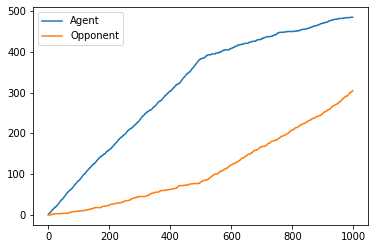

In [21]:
import matplotlib.pyplot as plt #### Plotting number of matches won by agent and opponent during testing
ax = np.arange(ntest-1)
plt.plot(ax,tl[:,0],label='Agent')
plt.plot(ax,tl[:,1],label='Opponent')
plt.legend()
plt.show()